<a href="https://colab.research.google.com/github/francescodisalvo05/polito-machine-learning-for-IoT/blob/main/Labs/Lab_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Temperature Forecasting

In [ ]:
!wget https://raw.githubusercontent.com/francescodisalvo05/polito-machine-learning-for-IoT/main/Datasets/log_temp.csv

In [103]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('log_temp.csv', names=["date","hour","temperature","humidity"])
df.fillna("error",inplace=True)

# temperature column is like T=temp
# whereas humidity is like H=hum
# clean

df["temperature"] = df["temperature"].apply(lambda x : float(x.split("=")[1]) if not x == "error" else np.nan)
df["humidity"] = df["humidity"].apply(lambda x : float(x.split("=")[1]) if not x == "error" else np.nan)

## Check null values and anomalies

Text(0.5, 1.0, 'Humidity')

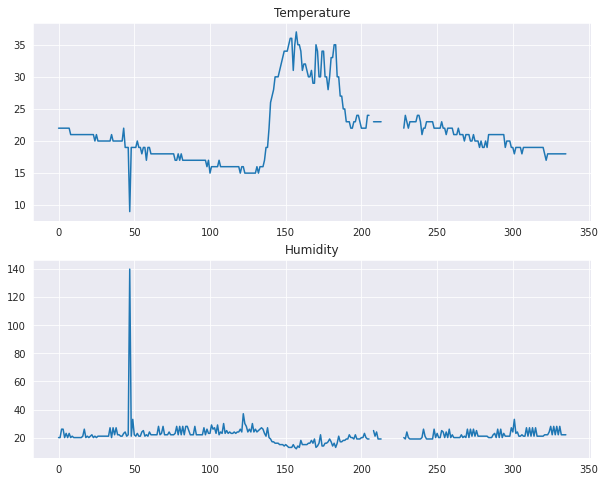

In [83]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,8), nrows=2, ncols=1)

ax[0].plot(df.temperature)
ax[0].set_title("Temperature")

ax[1].plot(df.humidity)
ax[1].set_title("Humidity")

From this chart we can see that
* there is an anomaly around 50
* there are some (16) missing values around 220

## Handle anomaly

In [105]:
# it is the one at index 47 -> force to NaN
df_new = df.copy()
df_new.iloc[47] = [df_new.iloc[47][0], df_new.iloc[47][1], np.nan, np.nan]

In [106]:
df_new.iloc[47]

date            3/14/19
hour           23:53:41
temperature         NaN
humidity            NaN
Name: 47, dtype: object

## Handle missing values

In [107]:
# interpolation through nearest neighbor
df_cleaned = df_new.interpolate('nearest')

Text(0.5, 1.0, 'Humidity')

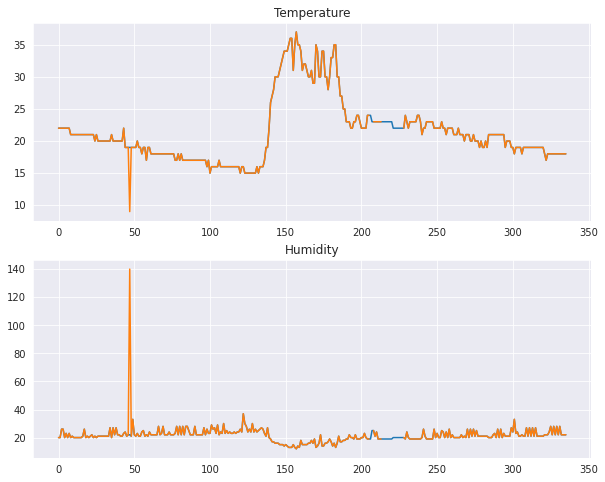

In [108]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2, ncols=1)

ax[0].plot(df_cleaned.temperature)
ax[0].plot(df.temperature)
ax[0].set_title("Temperature")

ax[1].plot(df_cleaned.humidity)
ax[1].plot(df.humidity)
ax[1].set_title("Humidity")

## Part 2 - Predictive Maintainance

In [ ]:
!wget https://raw.githubusercontent.com/hankroark/Turbofan-Engine-Degradation/master/CMAPSSData/train_FD001.txt
!wget https://raw.githubusercontent.com/hankroark/Turbofan-Engine-Degradation/master/CMAPSSData/test_FD001.txt

In [126]:
names = ["engine_no", "time_in_cycles", "operational_setting_1", "operational_setting_2", "operational_setting_3",
         "sensor_measurement_1", "sensor_measurement_2", "sensor_measurement_3", "sensor_measurement_4", "sensor_measurement_5",
         "sensor_measurement_6", "sensor_measurement_7", "sensor_measurement_8", "sensor_measurement_9", "sensor_measurement_10",
         "sensor_measurement_11", "sensor_measurement_12", "sensor_measurement_13", "sensor_measurement_14", "sensor_measurement_15",
         "sensor_measurement_16", "sensor_measurement_17", "sensor_measurement_18", "sensor_measurement_19", "sensor_measurement_20",
         "sensor_measurement_21", "sensor_measurement_22", "sensor_measurement_23",
         ]
df_train_nasa = pd.read_csv('train_FD001.txt', delimiter=' ', names=names)

In [127]:
names_test = names + ["RUL"]
df_test_nasa = pd.read_csv('test_FD001.txt', delimiter=' ', names=names_test)

In [131]:
df_train_nasa.head(2)

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN


In [132]:
df_test_nasa.head(2)

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,NaN
